# [Statistics]  Simple Linear Regression - (1) Basic Knowledge

#### "In fact, many types of mechanical approaches, from almost laughably simple rules to the most sophisticated and impenetrable machine learning, can outperform human judgement " , quoted from the book Noice, by Daniel Kahneman et al.

Question: Is there any correlation between the amount of bills and the amount of tips given? \
Here we are going to do a (artificial) study to investigate the relationship between amount of bills and amount of tips given.

We can study this by investigating the linear regression between the two variables\
In this notebook, I want to share what I have learned about simple linear regression and an easy example of it using python.

### Simple Linear Regression

#### Overview
Simple linear regression is used to estimate the relationship between two quantitative variables.\
Simple linear regression helps us to determine how strong the relationship between the two variables is. Next, we can estimate the value of dependent variable at a certain value of the independent variable(s).

----------------------------------
#### The assumption made for linear regression
 1. Homogeneity of Variance\
The size of our prediction does not change significantly across the value of the independent variable.\
In other words, the level of variance for particular variable is constant across the sample.

----------------------------------
2. Independence of observation\
Data is taken by standard sampling method, not by hidden relationship between observations.
----------------------------------
3. Normality\
The data follow normal distribution
----------------------------------
4. Linear Relationship\
For linear regression, the relationship between the independent(s) variable and dependent variable are assumed to be linear.
----------------------------------

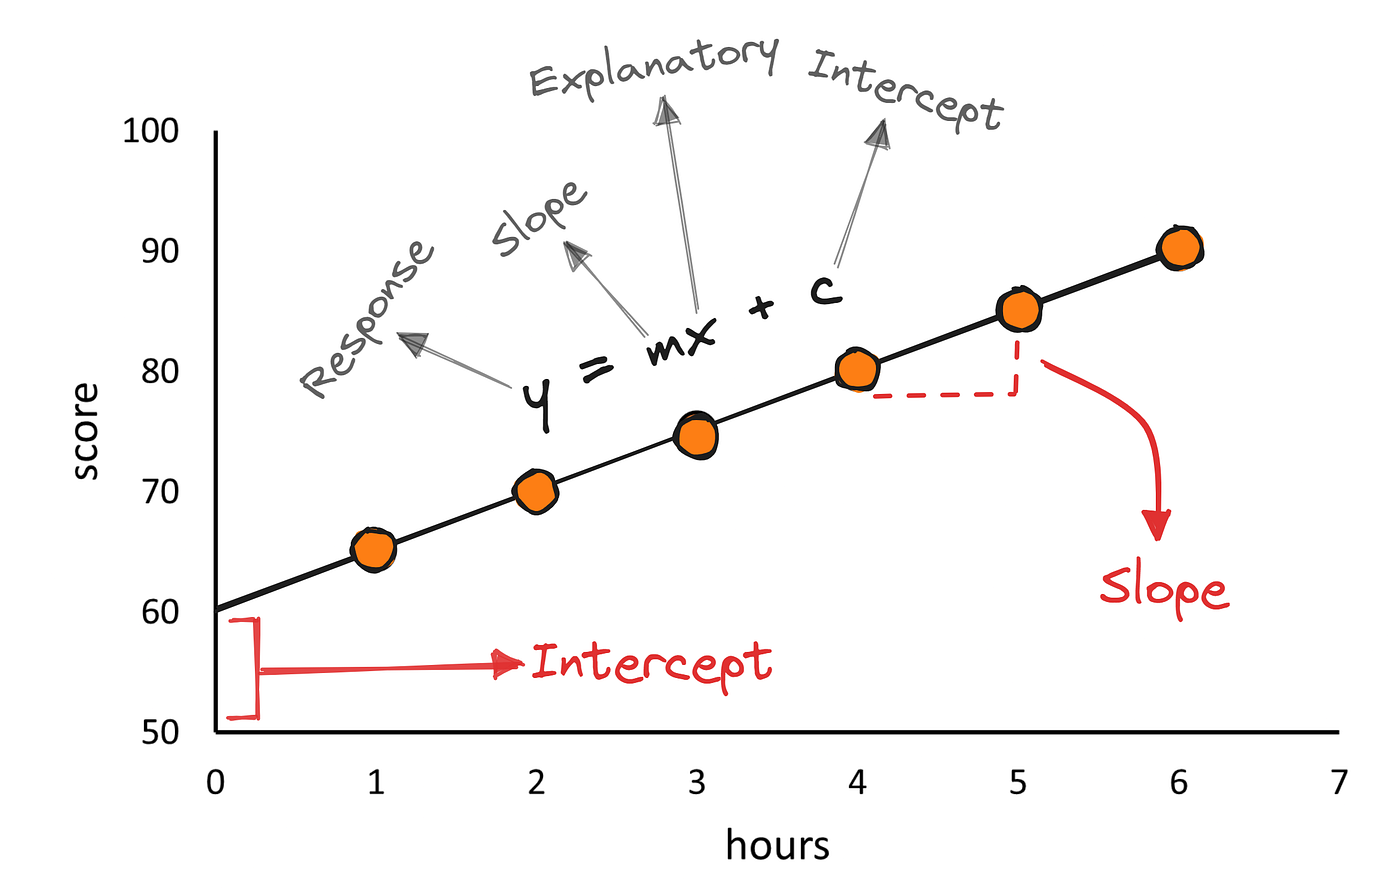

#### Equation

The equation for linear regression: y = c + mx

The calculation behind this is a little bit complex, it uses the Least Mean Squares Method (you can google it) ,\
but complexities aside, this equation can be used as the same as linear equation in high school, where,

x: independent variable\
y: dependent variable\
c: y-axis intercept\
m: the gradient of the line


----------------------------------
#### Application
Linear regression can be applied to various areas in business and academic study.\
You'll find that linear regression is used in everything from biological, behavioral, environmental and social sciences to business.

#### Import library

In [45]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import library for linear regression

import statsmodels.api as sm

%matplotlib inline

#### Make dataset

In [46]:
# create random dataset

# create dataset and assign x and y
# we create an artificial data of bills(independent variable) and tips given(dependent variable)

x = [34, 108, 64, 88, 99 ,51] 
y = [5, 17, 11, 8, 14, 5]
df = pd.DataFrame({"bills" : x, "tips" : y})
x = df.bills
y = df.tips
df

,bills,tips
0,34,5
1,108,17
2,64,11
3,88,8
4,99,14
5,51,5


#### Boxplot for x (indepent variable) and y (dependent variable)

<Axes: >

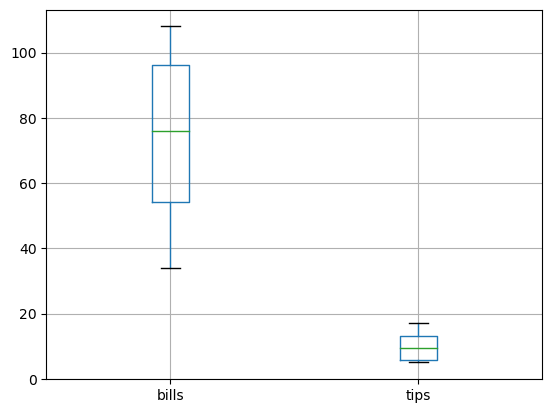

In [47]:
# use boxplot to see the distribution of dataset and identify outliers
# there are'nt any outliers in the data

df.boxplot()

#### Descriptive statistics of x and y

In [48]:
# check out the descriptive statistic
# we get the data set mean, median(50% percentile), and standard deviation 

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bills,6.0,74.0,29.003448,34.0,54.25,76.0,96.25,108.0
tips,6.0,10.0,4.898979,5.0,5.75,9.5,13.25,17.0


#### Scatterplot for x and y

Text(0, 0.5, 'Tips amount ($)')

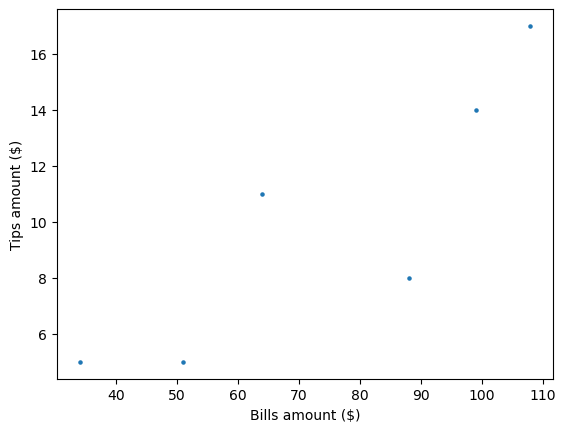

In [56]:
# see the trend using scatter plot
# we can notice upward trend between independent variable and dependent variable

plt.scatter(x, y, s  = 5 )
plt.xlabel("Bills amount ($)")
plt.ylabel("Tips amount ($)")

#### Regression result using Statsmodels library

In [50]:
# add constant and use OLS fit model
# we have to add constant to X to fit into statsmodels.OLS

X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   tips   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     11.96
Date:                Sat, 30 Dec 2023   Prob (F-statistic):             0.0259
Time:                        17:46:47   Log-Likelihood:                -13.349
No. Observations:                   6   AIC:                             30.70
Df Residuals:                       4   BIC:                             30.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8203      3.323     -0.247      0.8

C:\Users\Zikri\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#### The summary of the table

In [51]:
# r squared , prediction , coefficient
print("============================================================================")
print('The correlation between the two variables (r_value) is' ,round(model.rsquared**0.5,4))
print("============================================================================")
print('Our model accuracy (r_squared value) is' ,round(model.rsquared,4))
print("============================================================================")
print('The real value of dependent variable are', y.to_list())
print('The predicted value of dependent variable are' ,model.predict())
print("============================================================================")
print(f"The model parameter: \n{model.params}")
print("============================================================================")
print(f"Model equation: y = {round(model.params.bills,4)}x {round(model.params.const,4)}")
print("============================================================================")
print(f"For every one dollar spent on bills, the predicted tips amount will increase by ${round(model.params.bills,4)}")
print("============================================================================")

The correlation between the two variables (r_value) is 0.8657
Our model accuracy (r_squared value) is 0.7494
The real value of dependent variable are [5, 17, 11, 8, 14, 5]
The predicted value of dependent variable are [ 4.15121255 14.97146933  8.53780314 12.04707561 13.65549215  6.63694722]
The model parameter: 
const   -0.820257
bills    0.146220
dtype: float64
Model equation: y = 0.1462x -0.8203
For every one dollar spent on bills, the predicted tips amount will increase by $0.1462


#### Plot linear regression

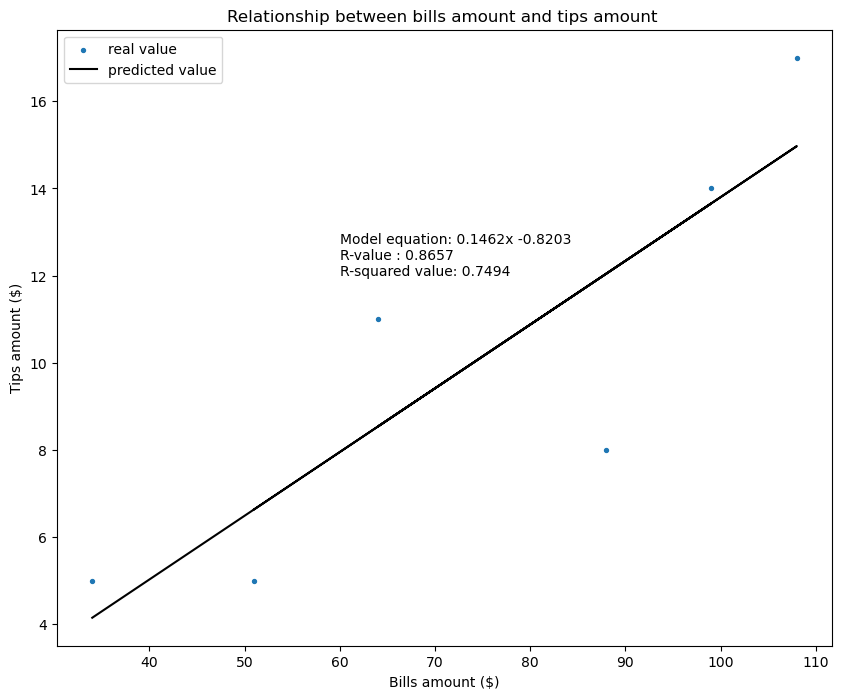

In [52]:
# plot linear regression

plt.figure(figsize = (10,8))
plt.scatter(x,y, s = 8, label = "real value")
plt.plot(x,model.predict(),color = "black", label = "predicted value")
plt.xlabel("Bills amount ($)")
plt.ylabel("Tips amount ($)")
plt.text(60, 12, 
         f"""Model equation: {round(model.params.bills,4)}x {round(model.params.const,4)}\nR-value : {round(model.rsquared**0.5,4)} \nR-squared value: {round(model.rsquared,4)}""",                                    
         fontsize = 10)
plt.title("Relationship between bills amount and tips amount ")
plt.legend()